In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt
import scipy.interpolate as interpolate
from mySSA import mySSA

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_sinha_2011 = np.genfromtxt('jhumar-wah-shikar2011_v1.txt', delimiter=",", dtype=float) # ismr reconstruction

In [3]:
yy_sinha_ann = np.flip(data_sinha_2011[:,0])
ismr_sinha_ann = np.flip(data_sinha_2011[:,1])

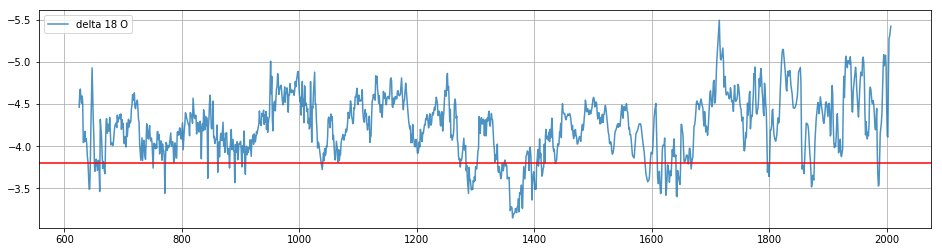

In [4]:
plt.figure(figsize=(16,4))
plt.plot(yy_sinha_ann, ismr_sinha_ann, label='delta 18 O', alpha=0.8)
plt.gca().invert_yaxis()
plt.axhline(y=-3.8, color='r')
plt.legend()
plt.grid()

Sinha, A. et al. The leading mode of Indian Summer Monsoon precipitation variability during the last millennium. Geophys. Res. Lett. 38, L15703 (2011).
Combined Core Monsoon Zone reconstruction from Jhumar and Dandak Caves
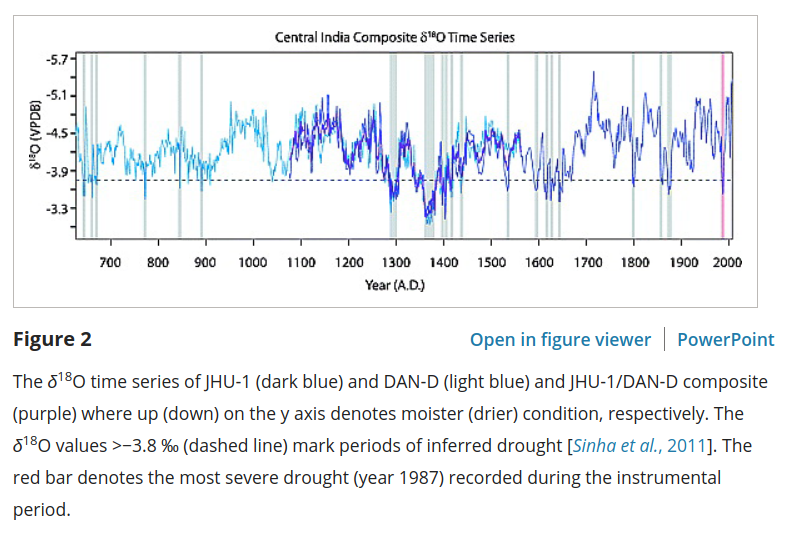

In [5]:
event_drought_sinha = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_trop = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_nh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_all_sh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_trop = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_nh = np.zeros((yy_sinha_ann.shape[0]))
event_yy_volc_strong_sh = np.zeros((yy_sinha_ann.shape[0]))

In [6]:
event_drought_sinha[ismr_sinha_ann>-3.8] = 1.0

for i in range(yy_sinha_ann.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == yy_sinha_ann[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=3.7:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [7]:
np.savetxt('drought_sinha_2011.txt', event_drought_sinha, delimiter=",")
np.savetxt('all_volc_sinha_2011.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_sinha_2011.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_sinha_2011.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_sinha_2011.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_sinha_2011.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_sinha_2011.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_sinha_2011.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_sinha_2011.txt', event_yy_volc_strong_sh, delimiter=",")

In [8]:
np.sum(event_yy_volc_all_sh)

36.0